<a href="https://colab.research.google.com/github/camilabarg/ImagensAnomaliaFMC/blob/main/FMCPrecipCMIP6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FMCPrecipCMIP6

O cartopy gosta de dar problemas!

In [ ]:
!pip install --upgrade  xarray zarr gcsfs cftime nc-time-axis 
!pip install git+https://github.com/SciTools/cartopy.git
!pip uninstall -y shapely;    
!pip install shapely --no-binary shapely;
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.io.shapereader as shpreader
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import cartopy
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6
fig = plt.figure(figsize=(15, 8))
from cartopy.feature import NaturalEarthFeature > #Tem dias que não funciona >> https://www.naturalearthdata.com

## Arquivo CMIP6

In [ ]:
lista_de_modelos = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
modelos=lista_de_modelos.query("table_id=='Amon' | table_id=='fx'" )
%load_ext google.colab.data_table


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


Filtrando termos. >
(https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q)
 1880-01 até 2014-12. 

In [ ]:
parametros="experiment_id == 'ssp585' & source_id == 'EC-Earth3' & variable_id == 'pr'"
modelo_tas = modelos.query(parametros )
modelo_tas

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
407326,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r6i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
407392,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r15i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
407408,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r13i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
407654,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r11i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
408351,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r9i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
422021,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r1i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200310
426459,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r134i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412
426490,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r133i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412
426577,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r130i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412
426607,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r129i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412


## Carregar dados


In [ ]:
# isso só precisa ser criado uma vez
gcs = gcsfs.GCSFileSystem(token='anon')

# obter o caminho para um armazenamento zarr específico (o primeiro do dataframe acima)
zstore = modelo_tas.zstore.values[0]
zstore
# criar uma interface de estilo de mapeamento mutável para a loja
mapper = gcs.get_mapper(zstore)

# abra usando xarray e zarr
ds = xr.open_zarr(mapper, consolidated=True)
df=ds.pr.to_dataframe()

Funçoes

In [ ]:
def temperatura(mod):
  pd_tas_timeseries=mod.tas.to_pandas() # Transformando xarray para pandas
  tasm=pd_tas_timeseries.loc['1951-01':'1980-12'].mean() #Calculando a média de 1950 até 1980 como no GISS_TEMP
  return tasm # Temperatura média do modelo
def anomalias(mod):
  pd_tas_timeseries=mod.tas.to_pandas()
  pd_atas_timeseries=pd_tas_timeseries- temperatura(mod)
  ano=pd_atas_timeseries.resample("1y").median()
  yys=ano.reset_index()
  ys=yys[0] #separa a TAS
  tempo=yys['time'] #separa a data
  xx=tempo.to_list() #coloca em uma lista
  xs=np.int16([date.strftime("%Y") for date in xx]).tolist() #pegue apenas o ano e ignore o dia e mês
  plt.plot(xs, ys, label='NUIST')


In [ ]:
def get_lat_name(ds):
    for lat_name in ['lat', 'latitude']:
        if lat_name in ds.coords:
            return lat_name
    raise RuntimeError("Couldn't find a latitude coordinate")

def global_mean(ds):
    lat = ds[get_lat_name(ds)]
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

def busca(y):
  modelo_tas = modelos.query(y)
  return modelo_tas


def media12(par):

  gcs = gcsfs.GCSFileSystem(token='anon')
  modelo=busca(par)
  zstore = modelo.zstore.values[0]
  mapper = gcs.get_mapper(zstore)
  ds = xr.open_zarr(mapper, consolidated=True)
  df=ds.tas.to_dataframe()
  G= global_mean(ds) - 273
  #plt.plot(G.time, G.tas)
  Med12= G.rolling(time=12).mean()
  #plt.plot(Med12.time, Med12.tas)
  return Med12

In [ ]:

def america(mod):
  ds= mod
  min_lon = -88.0
  min_lat = -60.0
  max_lon = -30.0
  max_lat = 14
  min_lon = min_lon+360
  max_lon = max_lon+360
  mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
  mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)
  ams_tair = ds.tas.where(mask_lon & mask_lat, drop=True)
  return ams_tair

def america12(t):
  ds=america(t)
  G= global_mean(ds) - 273
  #plt.plot(G.time, G.tas)
  Med12= G.rolling(time=12).mean()
  #plt.plot(Med12.time, Med12.tas)
  return Med12

In [ ]:
def mapa(par):

  gcs = gcsfs.GCSFileSystem(token='anon')
  modelo=busca(par)
  zstore = modelo.zstore.values[0]
  mapper = gcs.get_mapper(zstore)
  ds = xr.open_zarr(mapper, consolidated=True)
  df=ds.pr.to_dataframe()
  return ds

Media precip

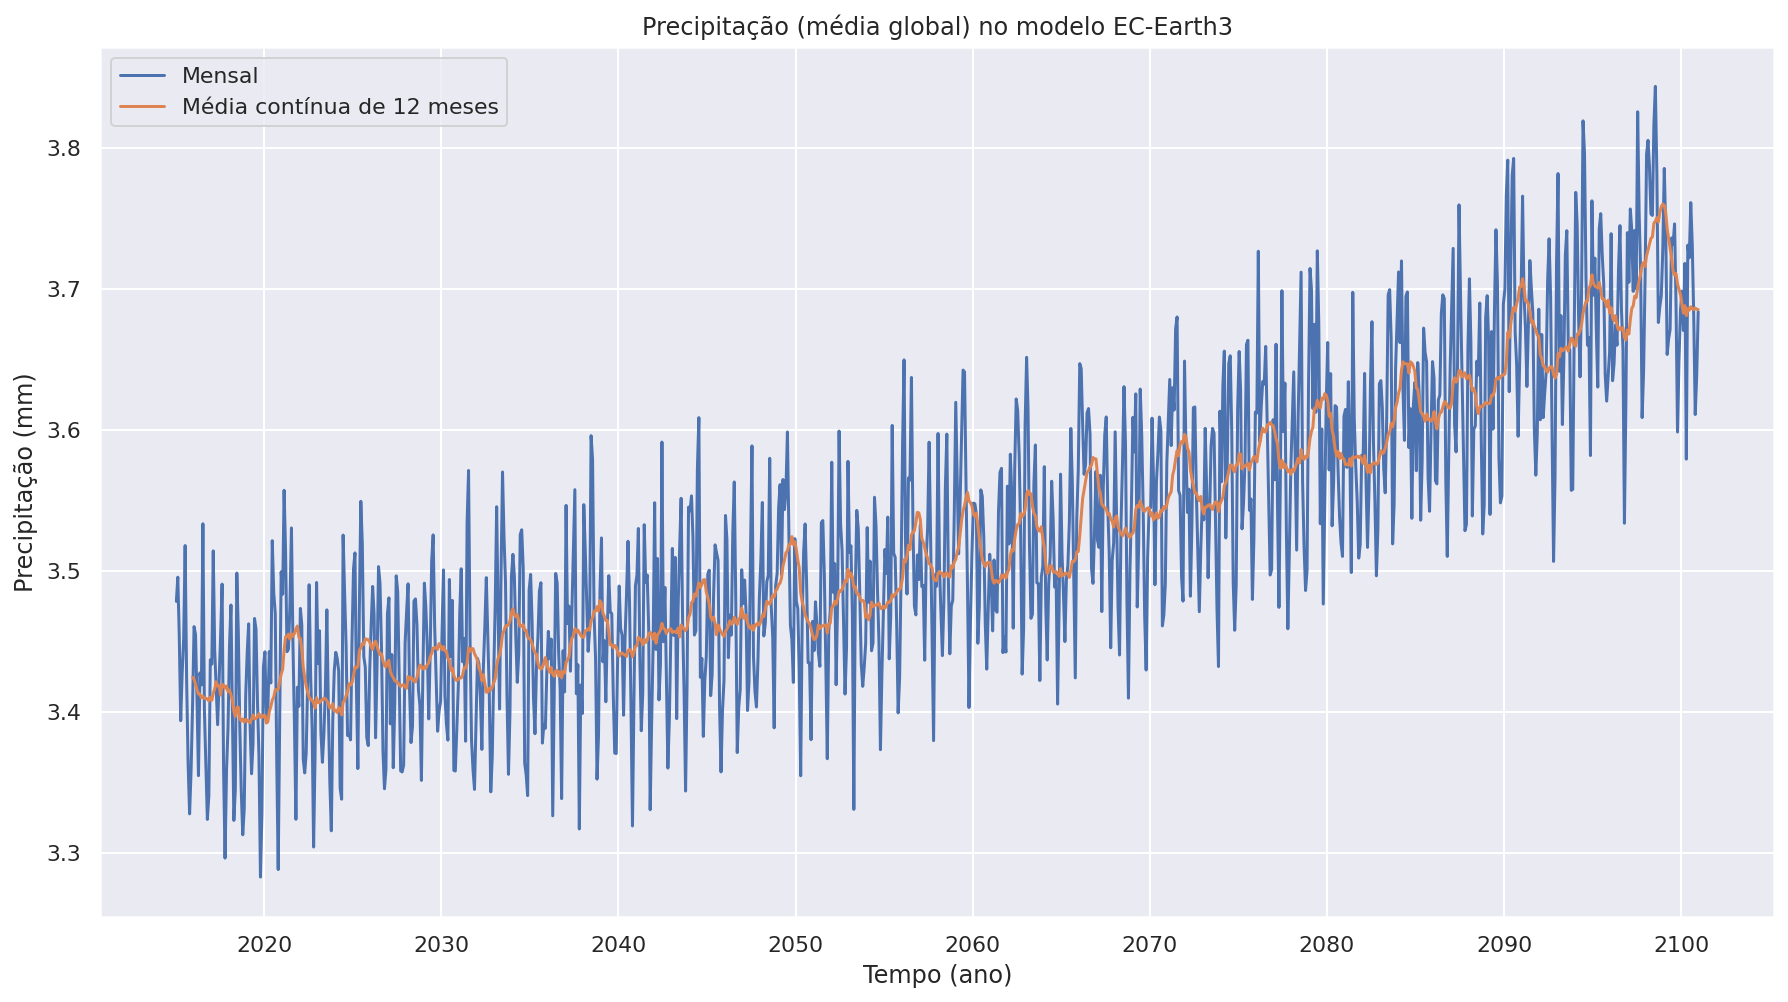

In [ ]:
sns.set_theme()
G=global_mean(ds)*10**5
plt.figure(figsize=(15, 8))
Med12= G.rolling(time=12).mean()
plt.xlabel('Tempo (ano)')
plt.ylabel('Precipitação (mm)')
plt.title('Precipitação (média global) no modelo EC-Earth3')
plt.plot(G.time, G.pr,label='Mensal')
plt.plot(Med12.time, Med12.pr, label='Média contínua de 12 meses')
plt.legend()



Imagens Anomalia Precipitação

In [ ]:
historico=mapa("experiment_id == 'historical' & source_id=='EC-Earth3' & variable_id == 'pr'")
alto=mapa("experiment_id == 'ssp585' & source_id=='EC-Earth3' & variable_id == 'pr'")


In [ ]:

temperature_change =historico['pr'].sel(time=slice('1990','2020')).mean(dim='time') -   historico['pr'].sel(time=slice('1950','1980')).mean(dim='time')
temperature_change = temperature_change*10**5
temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de precipitação (mm)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-5, vmax=5, center=0  )
p.axes.set_global()
p.axes.coastlines()
plt.title('Mudança na precipitação entre 1950-1980 e 1990-2020.')

In [ ]:
temperature_change =alto['pr'].sel(time=slice('2020','2050')).mean(dim='time') -   historico['pr'].sel(time=slice('1950','1980')).mean(dim='time')
temperature_change = temperature_change*10**5
temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de precipitação (mm)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-5, vmax=5, center=0)
p.axes.set_global()
p.axes.coastlines()
plt.title('Mudança na precipitação entre 1950-1980 e 2020-2050.')

Text(0.5, 1.0, 'Mudança na precipitação entre 1950-1980 e 2050-2080.')

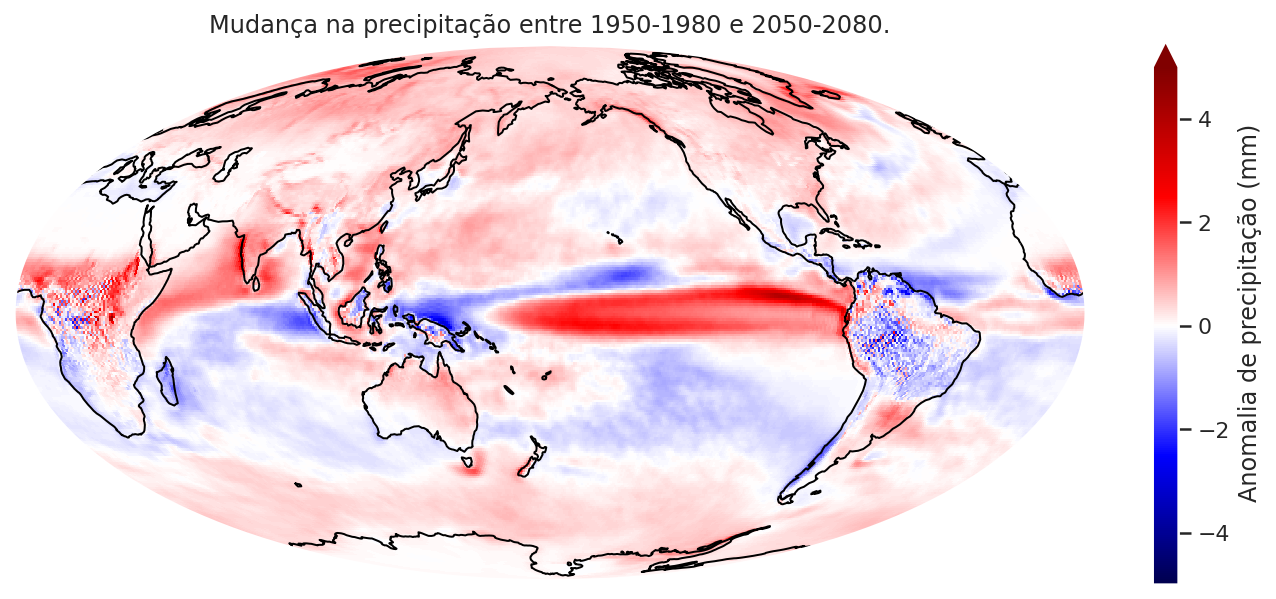

In [ ]:
temperature_change =alto['pr'].sel(time=slice('2050','2080')).mean(dim='time') -   historico['pr'].sel(time=slice('1950','1980')).mean(dim='time')
temperature_change = temperature_change*10**5
temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de precipitação (mm)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-5, vmax=5, center=0)
p.axes.set_global()
p.axes.coastlines()
plt.title('Mudança na precipitação entre 1950-1980 e 2050-2080.')

In [ ]:
temperature_change = historico['pr'].sel(time=slice('1950','1980')).mean(dim='time')
temperature_change = temperature_change*10**5
temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Precipitação (mm)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="grey"),
    transform=ccrs.PlateCarree(),cmap='seismic',
           vmin=-4, vmax=11, center=0)
p.axes.set_global()
p.axes.coastlines()
plt.title('Precipitação média do EC-Earth3 entre 1950-1980 ')

Text(0.5, 1.0, 'Mudança na precipitação entre 1950-1980 e 2070-2100.')

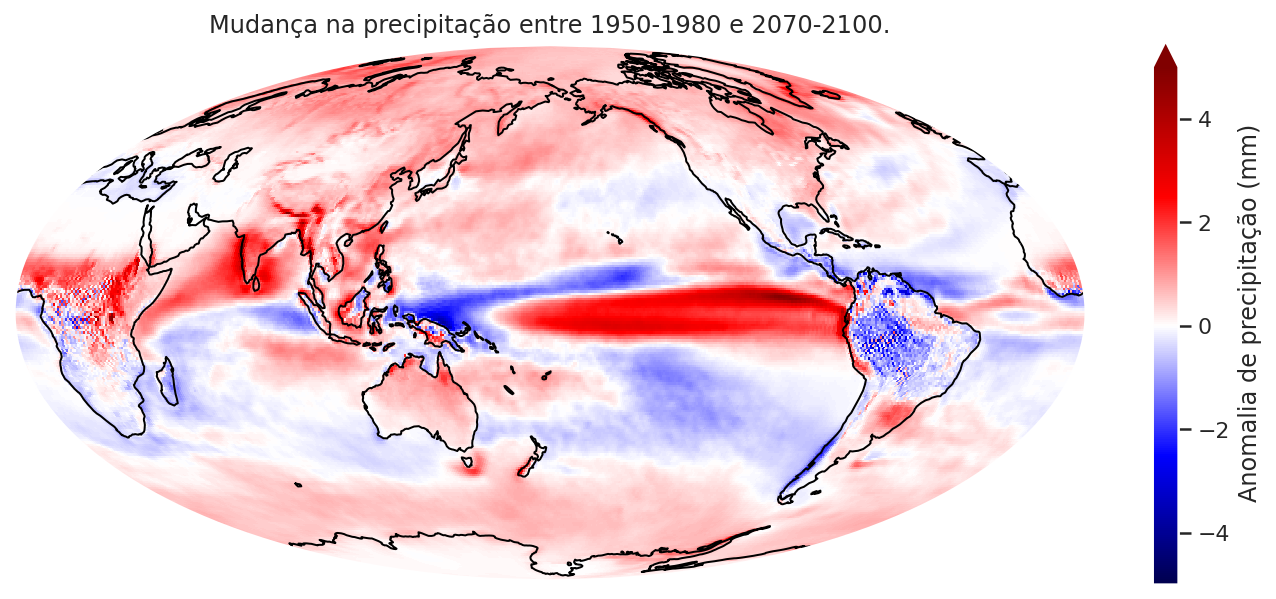

In [ ]:
temperature_change =alto['pr'].sel(time=slice('2070','2100')).mean(dim='time') -   historico['pr'].sel(time=slice('1950','1980')).mean(dim='time')
temperature_change = temperature_change*10**5
temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de precipitação (mm)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=-180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-5, vmax=5, center=0)
p.axes.set_global()
p.axes.coastlines()
plt.title('Mudança na precipitação entre 1950-1980 e 2070-2100.')

GIF precip


Opening the GIF..



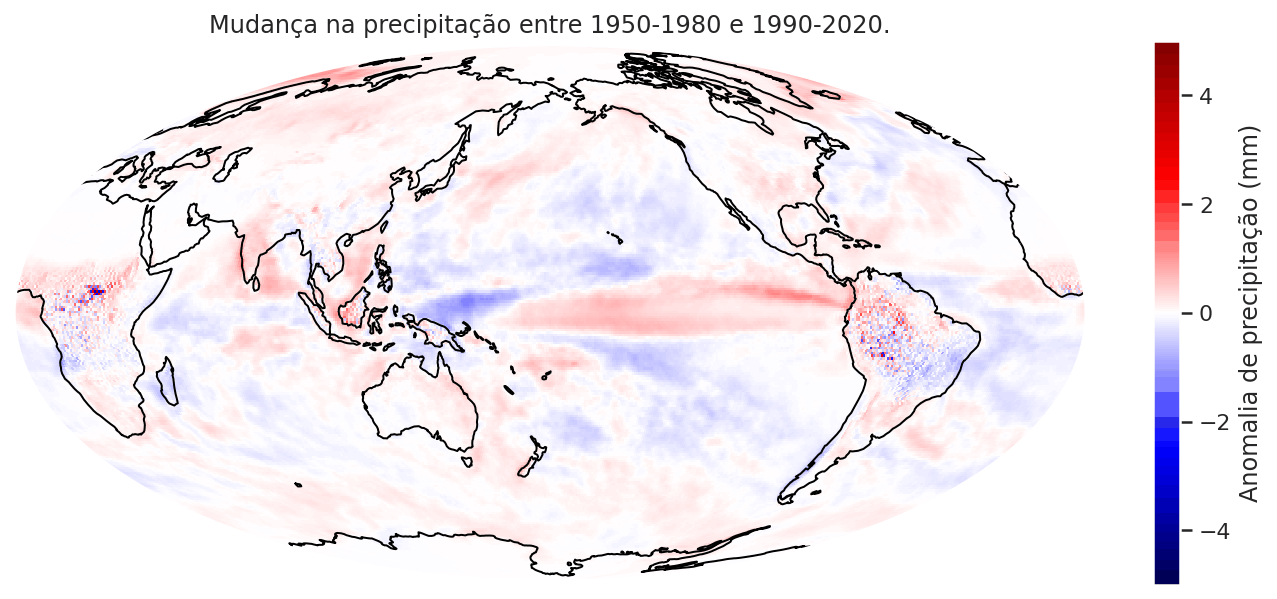

In [ ]:
import imageio 

files=['AnomaliaPrec50-80-90-20.png','AnomaliaPrec50-80-20-50png.png','AnomaliaPrec50-80-50-80png.png','AnomaliaPrec50-80-70-100EC.png']

images=[]
for file in files:
    images.append(imageio.imread(file))
imageio.mimsave('animation.gif', images, fps=1)
print("\nOpening the GIF..\n")
from IPython.display import Image
Image(open('animation.gif','rb').read())